In [ ]:
!pip install geopandas

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
# Load the GeoJSON file
gdf = gpd.read_file(r"D:\DEPI AI_Data science\final project\visualization\sample.geojson")
gdf.head(5)

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,...,label,confidence,image,lon,lat,x1,y1,x2,y2,geometry
0,9929693,5114,secondary,شارع دكتور على مصطفى مشرفه,None,F,0,0,F,F,...,none,0.95,image_29ead06c.jpg,-1.909644,72.458964,0.1672,0.2710,0.3152,0.5201,"LINESTRING (29.90688 31.20802, 29.90695 31.207..."
1,24228847,5115,tertiary,شارع الشهيد محمد السيد حنفى,None,F,0,0,F,F,...,crack,0.93,image_b981f4e7.jpg,-149.663118,-66.493054,0.4991,0.3157,0.9736,0.4988,"LINESTRING (29.93321 31.21829, 29.93328 31.218..."
2,24450793,5114,secondary,ميدان عزبة سعد,None,F,0,0,F,F,...,none,0.66,image_c9184839.jpg,156.020746,-85.787536,0.2570,0.8961,0.3423,0.9173,"LINESTRING (29.94094 31.2081, 29.94087 31.2081..."
3,24662354,5122,residential,شارع ابن شجاع,None,B,0,0,F,F,...,crack,0.80,image_e14e2d5f.jpg,-3.580571,78.854298,0.3008,0.9293,0.5397,1.0000,"LINESTRING (29.90693 31.20658, 29.90785 31.205..."
4,25185997,5112,trunk,طريق قناه السويس,None,F,0,0,F,F,...,pothole,0.63,image_855c51f8.jpg,40.148048,-84.661764,0.3732,0.6835,0.6360,0.8869,"LINESTRING (29.91184 31.21014, 29.91195 31.210..."


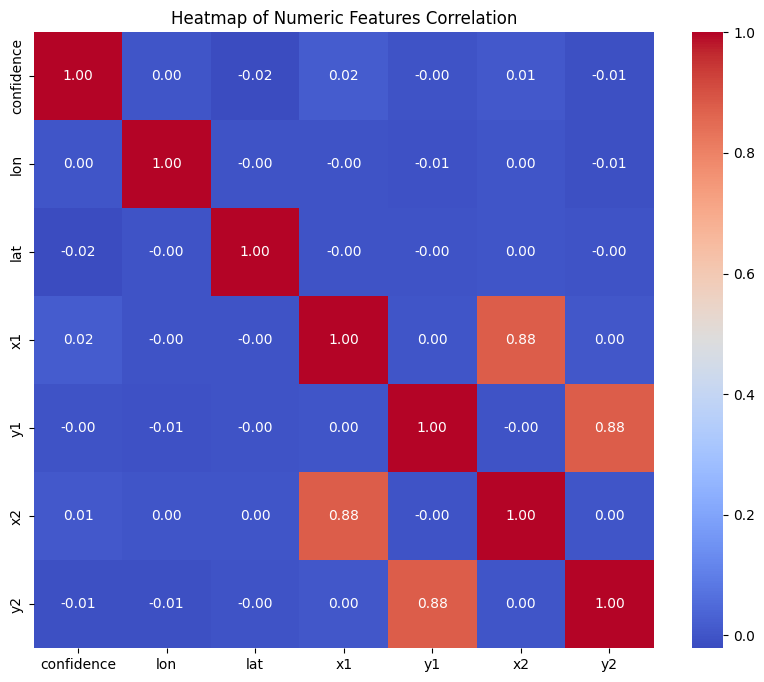

In [8]:
# choose numerical columns
numeric_cols = gdf.select_dtypes(include=['float64', 'int64'])

# 1. Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Numeric Features Correlation")
plt.show()

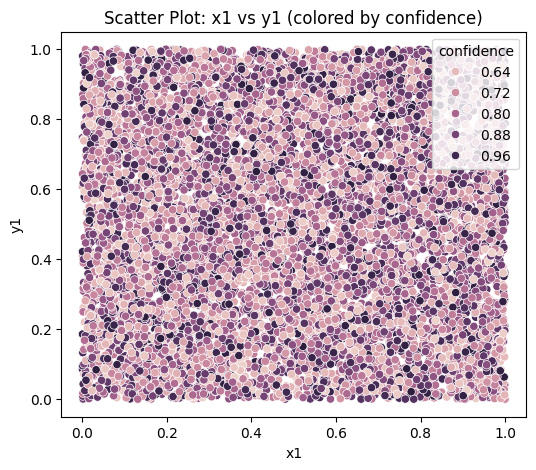

In [ ]:
# 2. Scatter plots
plt.figure(figsize=(6, 5))
sns.scatterplot(data=gdf, x="x1", y="y1", hue="confidence")
plt.title("Scatter Plot: x1 vs y1 (colored by confidence)")
plt.show()

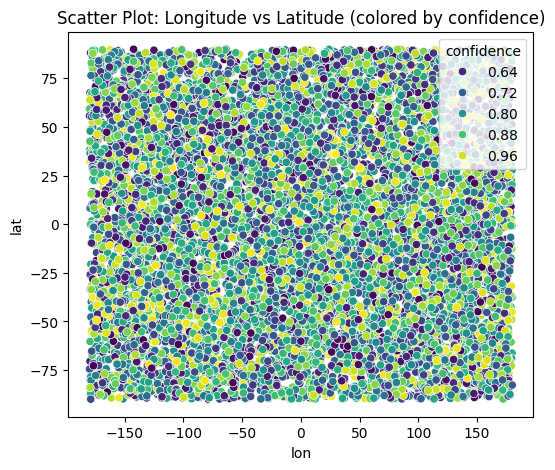

In [12]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=gdf, x="lon", y="lat", hue="confidence",palette="viridis" )
plt.title("Scatter Plot: Longitude vs Latitude (colored by confidence)")
plt.show()

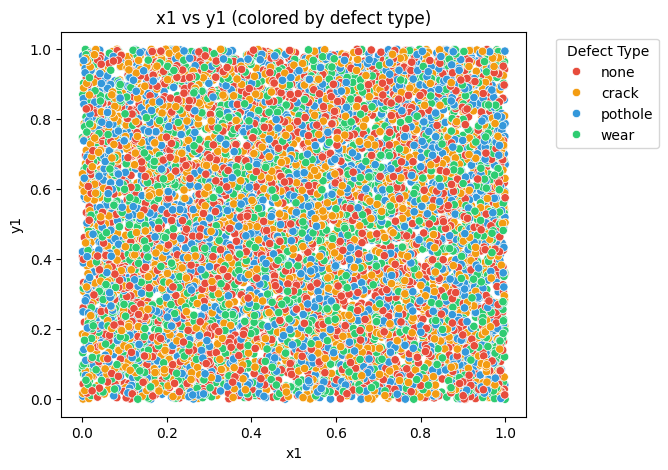

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom palette
custom_palette = ["#e74c3c", "#f39c12", "#3498db", "#2ecc71"]

# Scatter plot: x1 vs y1
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=gdf,
    x="x1", y="y1",
    hue="label",
    palette=custom_palette
)
plt.title("x1 vs y1 (colored by defect type)")
plt.legend(title="Defect Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


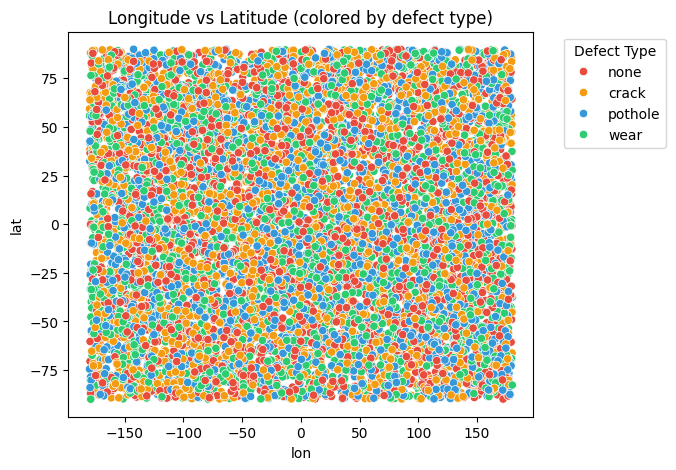

In [18]:
# Scatter plot: lon vs lat
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=gdf,
    x="lon", y="lat",
    hue="label",
    palette=custom_palette
)
plt.title("Longitude vs Latitude (colored by defect type)")
plt.legend(title="Defect Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


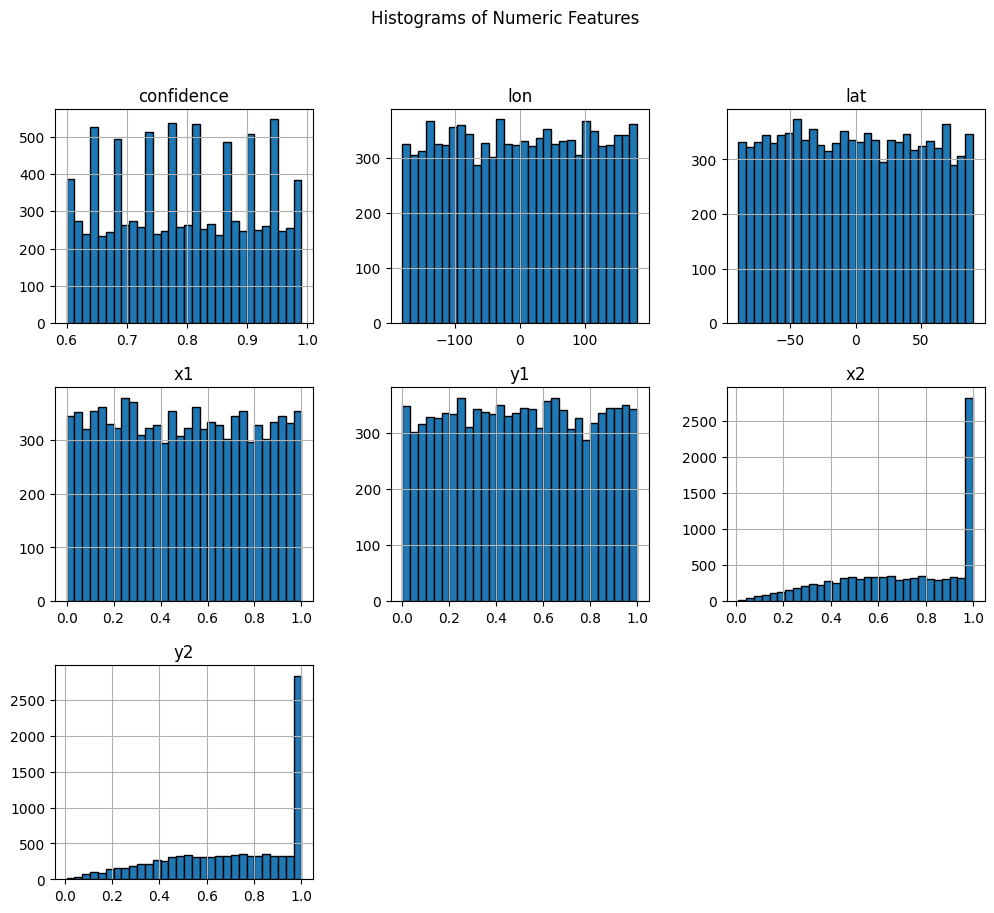

In [ ]:
# 3. Histograms of numeric variables
numeric_cols.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.show()